# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)', 
    2:  'Speed limit (50km/h)', 
    3:  'Speed limit (60km/h)', 
    4:  'Speed limit (70km/h)', 
    5:  'Speed limit (80km/h)', 
    6:  'End of speed limit (80km/h)', 
    7:  'Speed limit (100km/h)', 
    8:  'Speed limit (120km/h)', 
    9:  'No passing', 
    10: 'No passing veh over 3.5 tons', 
    11: 'Right-of-way at intersection', 
    12: 'Priority road', 
    13: 'Yield', 
    14: 'Stop', 
    15: 'No vehicles', 
    16: 'Veh > 3.5 tons prohibited', 
    17: 'No entry', 
    18: 'General caution', 
    19: 'Dangerous curve left', 
    20: 'Dangerous curve right', 
    21: 'Double curve', 
    22: 'Bumpy road', 
    23: 'Slippery road', 
    24: 'Road narrows on the right', 
    25: 'Road work', 
    26: 'Traffic signals', 
    27: 'Pedestrians', 
    28: 'Children crossing', 
    29: 'Bicycles crossing', 
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing', 
    32: 'End speed + passing limits', 
    33: 'Turn right ahead', 
    34: 'Turn left ahead', 
    35: 'Ahead only', 
    36: 'Go straight or right', 
    37: 'Go straight or left', 
    38: 'Keep right', 
    39: 'Keep left', 
    40: 'Roundabout mandatory', 
    41: 'End of no passing', 
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

## Import Libraries

In [10]:
import tensorflow as tf
import os
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import base64
from pymongo import MongoClient
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [11]:
df = pd.read_csv('Traffic_Signs/Dataset_MetaData.csv')

#drop ClassId > 5
df.drop(df[df['ClassId'] > 5].index, inplace = True)

df['ClassId'].value_counts()


ClassId
2    2250
1    2220
4    1980
5    1860
3    1410
0     210
Name: count, dtype: int64

In [12]:
img_height = 64
img_width = 64
num_classes = len(df['ClassId'].unique())


images = []
labels = []

for index, row in df.iterrows():

    img_path = ("Traffic_Signs/" + row['Path'])
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    

    img_array = img_array / 255.0
    
    images.append(img_array)
    labels.append(row['ClassId'])

images = np.array(images)
labels = to_categorical(labels, num_classes=num_classes)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [14]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [46]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9718 - val_loss: 0.1254
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9732 - val_loss: 0.1216
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9738 - val_loss: 0.1194
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9698 - val_loss: 0.1343
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9938 - loss: 0.0247 - val_accuracy: 0.9020 - val_loss: 0.3503
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9650 - loss: 0.1126 - val_accuracy: 0.9631 - val_loss: 0.1517
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9644 - val_loss: 0.1462
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9983 - loss: 0.0100 - v

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [47]:
#The accuracy
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f'Validation Loss: {test_loss}')
print(f'Validation Accuracy: {test_accuracy}')


 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.0283

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9728 - loss: 0.1205
Validation Loss: 0.15100066363811493
Validation Accuracy: 0.9671140909194946


## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [48]:
df2 = pd.read_csv('Test_Dataset/Dataset_MetaData.csv')

#drop ClassId > 5
df2.drop(df2[df2['ClassId'] > 5].index, inplace = True)

df2['ClassId'].value_counts()


ClassId
2    750
1    720
4    660
5    630
3    450
0     60
Name: count, dtype: int64

In [49]:
img_height = 64
img_width = 64
num_classes = len(df['ClassId'].unique())


images = []
labels = []

for index, row in df.iterrows():

    img_path = ("Traffic_Signs/" + row['Path'])
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    

    img_array = img_array / 255.0
    
    images.append(img_array)
    labels.append(row['ClassId'])

images = np.array(images)
labels = to_categorical(labels, num_classes=num_classes)

In [50]:
test_dataset = tf.data.Dataset.from_tensor_slices((images, labels))

test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [51]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Validation Loss: {test_loss}')
print(f'Validation Accuracy: {test_accuracy}')


311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9947 - loss: 0.0310
Validation Loss: 0.026669412851333618
Validation Accuracy: 0.9946626424789429


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

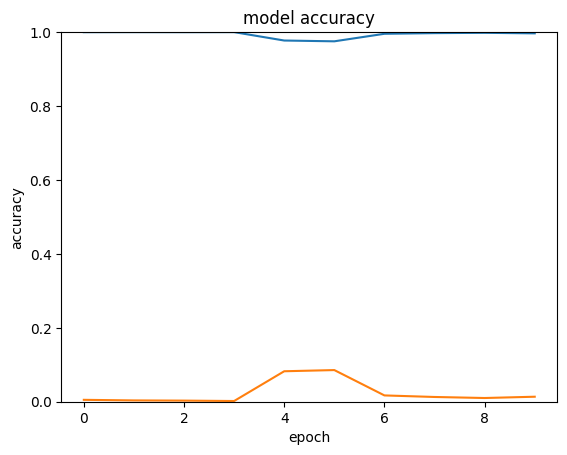

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.ylim(0, 1)  # Assuming the values are between 0 and 1
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('modelCNN.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: